In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [78]:
data = pd.read_excel('/Users/alejandroporras/Desktop/df.xlsx')

In [79]:

data2  = data.iloc[:-3]

In [80]:

data3 = data.tail(3).copy()

In [81]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data2.head())

First few rows of the dataset:
   Fecha    Ingresos  Desempleo  PIB per capita  Gasto Consumo personal  \
0   1993   8722308.0   6.908333        26364.19             4451.983333   
1   1994   4330100.0   6.100000        27674.02             4720.958333   
2   1995   9763400.0   5.591667        28671.48             4962.600000   
3   1996  11831600.0   5.408333        29946.97             5244.600000   
4   1997  13749600.0   4.941667        31440.09             5536.783333   

    Interes  Gasto en salud per capita  Inflacion  Empleados en salud  \
0  3.022500                     3486.0   2.951657         9253.458333   
1  4.201667                     3644.0   2.607442         9529.825000   
2  5.836667                     3808.0   2.805420         9808.958333   
3  5.298333                     3967.0   2.931204        10093.025000   
4  5.460000                     4143.0   2.337690        10358.191667   

       Poblacion       Latinos  African- americans        Blancos  \
0  260146.

In [82]:
# Perform basic statistics on numerical columns
print("\nBasic statistics:")
print(data2.describe())


Basic statistics:
             Fecha      Ingresos  Desempleo  PIB per capita  \
count    30.000000  3.000000e+01  30.000000       30.000000   
mean   2007.500000  9.966516e+07   5.745556    46955.168667   
std       8.803408  9.437139e+07   1.660720    13368.551894   
min    1993.000000  4.330100e+06   3.633333    26364.190000   
25%    2000.250000  2.062598e+07   4.610417    36509.947500   
50%    2007.500000  8.154150e+07   5.379167    47522.890000   
75%    2014.750000  1.498092e+08   6.143750    56318.137500   
max    2022.000000  3.224670e+08   9.608333    76343.250000   

       Gasto Consumo personal    Interes  Gasto en salud per capita  \
count               30.000000  30.000000                  30.000000   
mean              9722.395833   2.398833                7693.700000   
std               3560.848216   2.161479                2988.277651   
min               4451.983333   0.080000                3486.000000   
25%               6843.829167   0.225208                49

In [83]:
# Check for missing values
print("\nMissing values:")
print(data2.isnull().sum())


Missing values:
Fecha                        0
Ingresos                     0
Desempleo                    0
PIB per capita               0
Gasto Consumo personal       0
Interes                      0
Gasto en salud per capita    0
Inflacion                    0
Empleados en salud           0
Poblacion                    0
Latinos                      0
African- americans           0
Blancos                      0
Edad 16-19                   0
Edad 20 - 24                 0
Edad 25-54                   0
Edad 55+                     0
dtype: int64


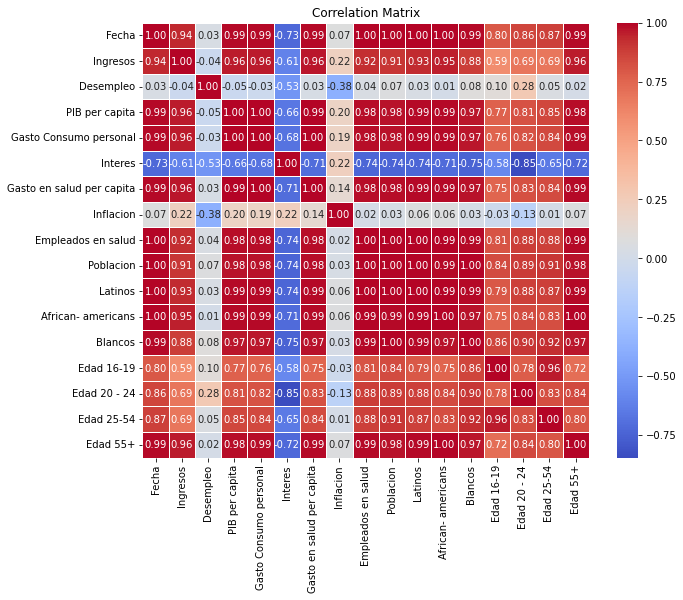

In [84]:
# Visualize the correlation matrix
corr_matrix = data2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [100]:
# Perform correlation analysis
correlation_matrix = data2.corr()
# Assuming 'Ingresos' is the target variable
income_correlation = correlation_matrix['Ingresos'].abs().sort_values(ascending=False)
print("Correlation with 'Ingresos':")
print(income_correlation)

Correlation with 'Ingresos':
Ingresos                     1.000000
Gasto en salud per capita    0.964655
Gasto Consumo personal       0.962375
Edad 55+                     0.961668
PIB per capita               0.957894
African- americans           0.954177
Fecha                        0.938574
Latinos                      0.934335
Empleados en salud           0.922099
Poblacion                    0.905991
Blancos                      0.884469
Edad 20 - 24                 0.689282
Edad 25-54                   0.687026
Interes                      0.610623
Edad 16-19                   0.589217
Inflacion                    0.215314
Desempleo                    0.043571
Name: Ingresos, dtype: float64


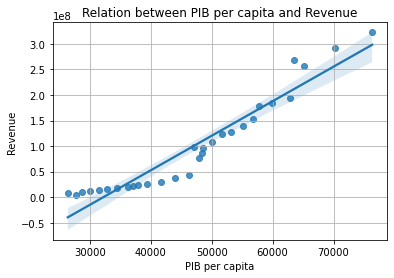

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'PIB per capita' is the independent variable and 'revenue' is the dependent variable
sns.regplot(x='PIB per capita', y='Ingresos', data=data2)
plt.title('Relation between PIB per capita and Revenue')
plt.xlabel('PIB per capita')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


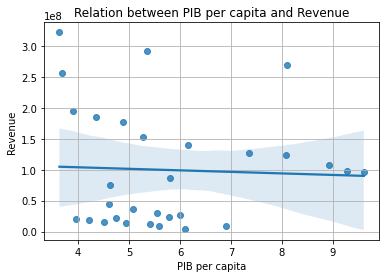

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'PIB per capita' is the independent variable and 'revenue' is the dependent variable
sns.regplot(x='Desempleo', y='Ingresos', data=data2)
plt.title('Relation between PIB per capita and Revenue')
plt.xlabel('PIB per capita')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


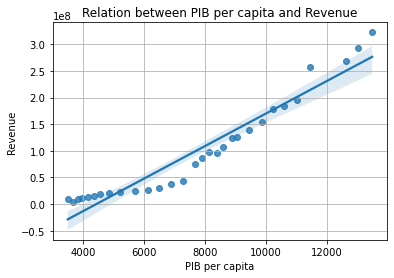

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'PIB per capita' is the independent variable and 'revenue' is the dependent variable
sns.regplot(x='Gasto en salud per capita', y='Ingresos', data=data2)
plt.title('Relation between PIB per capita and Revenue')
plt.xlabel('PIB per capita')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

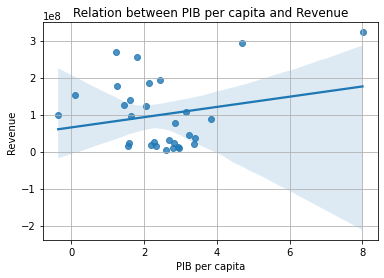

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'PIB per capita' is the independent variable and 'revenue' is the dependent variable
sns.regplot(x='Inflacion', y='Ingresos', data=data2)
plt.title('Relation between PIB per capita and Revenue')
plt.xlabel('PIB per capita')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

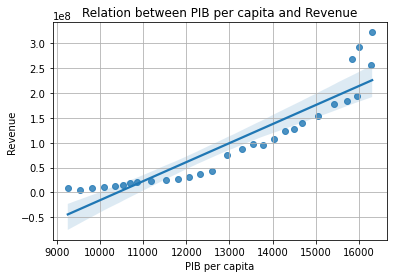

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'PIB per capita' is the independent variable and 'revenue' is the dependent variable
sns.regplot(x='Empleados en salud', y='Ingresos', data=data2)
plt.title('Relation between PIB per capita and Revenue')
plt.xlabel('PIB per capita')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

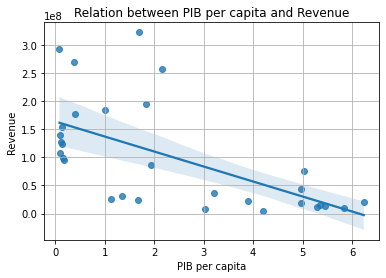

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'PIB per capita' is the independent variable and 'revenue' is the dependent variable
sns.regplot(x='Interes', y='Ingresos', data=data2)
plt.title('Relation between PIB per capita and Revenue')
plt.xlabel('PIB per capita')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

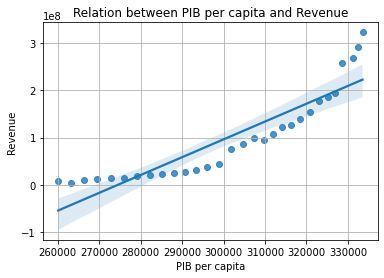

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'PIB per capita' is the independent variable and 'revenue' is the dependent variable
sns.regplot(x='Poblacion', y='Ingresos', data=data2)
plt.title('Relation between PIB per capita and Revenue')
plt.xlabel('PIB per capita')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [92]:
import statsmodels.api as sm

# Assuming 'PIB per capita' is the independent variable and 'revenue' is the dependent variable
X = data2['PIB per capita']  # Independent variable
y = data2['Ingresos']         # Dependent variable

# Add constant for the intercept term
X_with_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_const)
results = model.fit()

# Print the summary which includes p-values
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:               Ingresos   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     311.6
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.04e-16
Time:                        00:19:34   Log-Likelihood:                -555.51
No. Observations:                  30   AIC:                             1115.
Df Residuals:                      28   BIC:                             1118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.178e+08   1.87e+07    -11.

/Users/alejandroporras/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [93]:
import statsmodels.api as sm

# Assuming 'PIB per capita' is the independent variable and 'revenue' is the dependent variable
X = data2['Desempleo']  # Independent variable
y = data2['Ingresos']         # Dependent variable

# Add constant for the intercept term
X_with_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_const)
results = model.fit()

# Print the summary which includes p-values
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Ingresos   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                   0.05326
Date:                Mon, 19 Feb 2024   Prob (F-statistic):              0.819
Time:                        00:19:40   Log-Likelihood:                -592.91
No. Observations:                  30   AIC:                             1190.
Df Residuals:                      28   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.139e+08   6.41e+07      1.777      0.0

/Users/alejandroporras/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [94]:
import statsmodels.api as sm

# Assuming 'PIB per capita' is the independent variable and 'revenue' is the dependent variable
X = data2['Edad 55+']  # Independent variable
y = data2['Ingresos']         # Dependent variable

# Add constant for the intercept term
X_with_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_const)
results = model.fit()

# Print the summary which includes p-values
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Ingresos   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     344.4
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           2.86e-17
Time:                        00:19:44   Log-Likelihood:                -554.13
No. Observations:                  30   AIC:                             1112.
Df Residuals:                      28   BIC:                             1115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.057e+08   2.24e+07    -13.667      0.0

/Users/alejandroporras/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Drop the column named "fecha"
data2.drop(columns=["Fecha"], inplace=True)



In [114]:
# Drop the column named "fecha"
data3.drop(columns=["Fecha"], inplace=True)

In [104]:
# Check for multicollinearity using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data2):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data2.columns
    vif_data["VIF"] = [variance_inflation_factor(data2.values, i) for i in range(len(data2.columns))]
    return vif_data

print("\nVIF (Variance Inflation Factor):")
print(calculate_vif(data2))


VIF (Variance Inflation Factor):
                      Feature           VIF
0                    Ingresos  3.733836e+02
1                   Desempleo  1.956041e+02
2              PIB per capita  1.110928e+05
3      Gasto Consumo personal  7.679451e+04
4                     Interes  4.450543e+01
5   Gasto en salud per capita  4.736313e+03
6                   Inflacion  2.758541e+01
7          Empleados en salud  1.864516e+04
8                   Poblacion  7.123926e+05
9                     Latinos  2.544319e+04
10         African- americans  2.299419e+05
11                    Blancos  1.270181e+06
12                 Edad 16-19  3.838897e+04
13               Edad 20 - 24  2.065318e+04
14                 Edad 25-54  5.109499e+05
15                   Edad 55+  1.892653e+05



Feature Importance:
                      Feature  Importance
10                    Blancos    0.123352
2      Gasto Consumo personal    0.122752
9          African- americans    0.122263
14                   Edad 55+    0.121100
6          Empleados en salud    0.108695
7                   Poblacion    0.101799
8                     Latinos    0.095816
4   Gasto en salud per capita    0.088649
1              PIB per capita    0.055566
11                 Edad 16-19    0.017844
12               Edad 20 - 24    0.017093
13                 Edad 25-54    0.009228
0                   Desempleo    0.006460
3                     Interes    0.004793
5                   Inflacion    0.004587


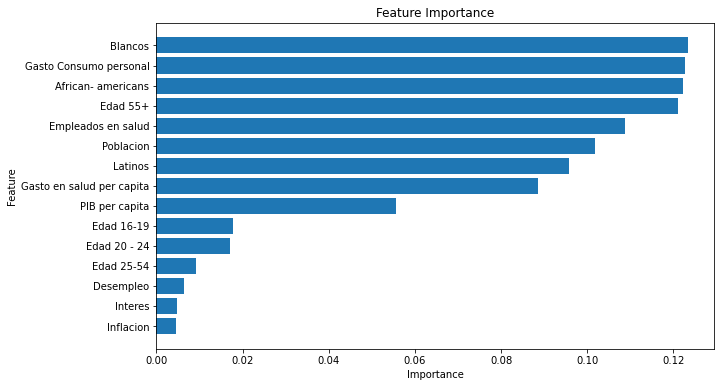

In [106]:
from sklearn.ensemble import RandomForestRegressor

# Perform feature importance using Random Forest
X = data2.drop(columns=['Ingresos'])  # Drop the target variable
y = data2['Ingresos']

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

In [108]:
from sklearn.decomposition import PCA

# Assuming 'data' contains the remaining features after feature selection

# Calculate the correlation matrix
correlation_matrix = data2.corr().abs()

# Create a mask to identify highly correlated features
high_correlation_mask = correlation_matrix > 0.8  # Adjust the threshold as needed

# Exclude diagonal and lower triangle elements
high_correlation_mask = high_correlation_mask.mask(np.tril(np.ones(correlation_matrix.shape)).astype(np.bool))

# Identify pairs of highly correlated features
high_correlation_pairs = [(column, correlation_matrix.columns[index]) for column, index in high_correlation_mask.any().items() if index]

# Print highly correlated feature pairs
print("Highly Correlated Feature Pairs:")
for pair in high_correlation_pairs:
    print(pair)

# Remove one feature from each highly correlated pair
# For demonstration purposes, we'll remove the first feature from each pair
reduced_data = data2.drop(columns=[pair[0] for pair in high_correlation_pairs])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_transformed_data = pca.fit_transform(reduced_data)

# Print the number of components retained
print("Number of Principal Components:", pca.n_components_)

# Optionally, you can convert the PCA transformed data back to a DataFrame
pca_transformed_df = pd.DataFrame(data=pca_transformed_data, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])


Highly Correlated Feature Pairs:
('PIB per capita', array([['Ingresos', 'Desempleo', 'PIB per capita',
        'Gasto Consumo personal', 'Interes', 'Gasto en salud per capita',
        'Inflacion', 'Empleados en salud', 'Poblacion', 'Latinos',
        'African- americans', 'Blancos', 'Edad 16-19', 'Edad 20 - 24',
        'Edad 25-54', 'Edad 55+']], dtype=object))
('Gasto Consumo personal', array([['Ingresos', 'Desempleo', 'PIB per capita',
        'Gasto Consumo personal', 'Interes', 'Gasto en salud per capita',
        'Inflacion', 'Empleados en salud', 'Poblacion', 'Latinos',
        'African- americans', 'Blancos', 'Edad 16-19', 'Edad 20 - 24',
        'Edad 25-54', 'Edad 55+']], dtype=object))
('Gasto en salud per capita', array([['Ingresos', 'Desempleo', 'PIB per capita',
        'Gasto Consumo personal', 'Interes', 'Gasto en salud per capita',
        'Inflacion', 'Empleados en salud', 'Poblacion', 'Latinos',
        'African- americans', 'Blancos', 'Edad 16-19', 'Edad 20 - 24',


/var/folders/38/s_4w5wrd7h7bj29_g6nnxv2h0000gn/T/ipykernel_71325/1867941243.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  high_correlation_mask = high_correlation_mask.mask(np.tril(np.ones(correlation_matrix.shape)).astype(np.bool))


In [110]:
from sklearn.decomposition import PCA

# Assuming 'data' contains the remaining features after feature selection

# Perform PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_transformed_data = pca.fit_transform(data2)

# Print the number of components retained
print("Number of Principal Components:", pca.n_components_)

# Optionally, you can convert the PCA transformed data back to a DataFrame
pca_transformed_df = pd.DataFrame(data=pca_transformed_data, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
print("PCA Transformed DataFrame:")
print(pca_transformed_df)


Number of Principal Components: 1
PCA Transformed DataFrame:
             PC1
0  -9.094286e+07
1  -9.533507e+07
2  -8.990177e+07
3  -8.783357e+07
4  -8.591557e+07
5  -8.439157e+07
6  -8.156686e+07
7  -7.957766e+07
8  -7.742376e+07
9  -7.548366e+07
10 -7.307716e+07
11 -6.907086e+07
12 -6.265846e+07
13 -5.584376e+07
14 -2.358716e+07
15 -1.266015e+07
16 -1.450155e+06
17 -3.887153e+06
18  7.414847e+06
19  2.345485e+07
20  2.709585e+07
21  3.970185e+07
22  5.362485e+07
23  7.788085e+07
24  8.512085e+07
25  9.491385e+07
26  1.571108e+08
27  1.690408e+08
28  1.924458e+08
29  2.228018e+08


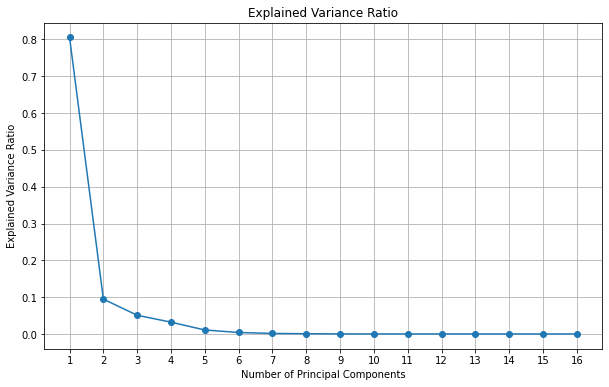

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame containing the independent variables
# Drop any non-numeric columns if present
numeric_data = data2.drop(columns=['Fecha'])  # Assuming 'Fecha' is non-numeric

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

# Choose the number of principal components to retain based on the plot or a chosen threshold

# Transform the data using the chosen number of principal components
num_components = 3  # Example: Choose 3 principal components
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(scaled_data)

# Convert the PCA transformed data back to DataFrame for further analysis if needed
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i}' for i in range(1, num_components + 1)])


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' contains your features and target variable
X = data2.drop(columns=['Ingresos'])  # Features
y = data2['Ingresos']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 562762448162275.0
R-squared (R2) Score: 0.9258020492162935


In [120]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization parameter 'alpha' as needed
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization parameter 'alpha' as needed
lasso_model.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"  Mean Squared Error (MSE): {mse_ridge}")
print(f"  R-squared (R2) Score: {r2_ridge}")
print()

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f"  Mean Squared Error (MSE): {mse_lasso}")
print(f"  R-squared (R2) Score: {r2_lasso}")


Ridge Regression:
  Mean Squared Error (MSE): 424068218404556.75
  R-squared (R2) Score: 0.9440883219893834

Lasso Regression:
  Mean Squared Error (MSE): 101767464430682.64
  R-squared (R2) Score: 0.9865823717594017


/Users/alejandroporras/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443636540473532.2, tolerance: 21151491006515.234
  model = cd_fast.enet_coordinate_descent(


In [124]:
# Assuming 'data2' is your DataFrame containing features and 'Ingresos' target variable
# Assuming 'data3' is your DataFrame containing features from 2022 to 2025

# Extracting features and target variable from data2
X_data2 = data2.drop(columns=['Ingresos'])  # Features
y_data2 = data2['Ingresos']  # Target variable

# Extracting features from data3 (2022 to 2025)
X_data3 = data3.drop(columns=['Ingresos'])  # Features for prediction


In [140]:
from sklearn.metrics import mean_squared_error, r2_score

# Train the Lasso Regression model using data2
lasso_model = Lasso(alpha=1.0, max_iter=1000)  # Increase max_iter
lasso_model.fit(X_data2, y_data2)

# Use the trained Lasso Regression model to predict 'Ingresos' for the years 2023-2025 using data3
X_data3 = data3.drop(columns=['Ingresos'])
predictions_2023_2025 = lasso_model.predict(X_data3)

# Update the 'Ingresos' column in data3 with the predicted values
data3['Ingresos'] = predictions_2023_2025



/Users/alejandroporras/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 609604570813153.5, tolerance: 25827279963940.8
  model = cd_fast.enet_coordinate_descent(


In [137]:
predictions_2023_2025

array([3.47603622e+08, 3.66943392e+08, 3.82352807e+08])